In [ ]:
pip install -U scikit-fuzzy

In [ ]:
#Bài con lắc đơn
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

alpha = ctrl.Antecedent(np.arange(-90,91,1),'alpha')    
d_error = ctrl.Antecedent(np.arange(-45,46,0.5),'d_error')
force = ctrl.Consequent(np.arange(-100,101,200/180),'force')

alpha['LN'] = fuzz.trimf(alpha.universe,[-90,-90,-60])
alpha['N'] = fuzz.gaussmf(alpha.universe,-60,8)
alpha['0'] = fuzz.gaussmf(alpha.universe,0,15)
alpha['P'] = fuzz.gaussmf(alpha.universe,60,8)
alpha['LP'] = fuzz.trimf(alpha.universe,[60,90,90])

d_error['-2'] = fuzz.trimf(d_error.universe,[-45,-45,-30])
d_error['-1'] = fuzz.gaussmf(d_error.universe,-30,5)
d_error['0'] = fuzz.gaussmf(d_error.universe,0,8)
d_error['1'] = fuzz.gaussmf(d_error.universe,30,5)
d_error['2'] = fuzz.trimf(d_error.universe,[30,45,45])

force['HNF'] = fuzz.trimf(force.universe,[-100,-100,-70])   #Heavy Negative Force
force['LNF'] = fuzz.gaussmf(force.universe,-70,10)          #Negative Force
force['NF'] = fuzz.gaussmf(force.universe,0,15)             #No Force
force['LPF'] = fuzz.gaussmf(force.universe,70,10)           #Positive Force
force['HPF'] = fuzz.trimf(force.universe,[70,100,100])      #Heavy Positive Force

alpha.view()
d_error.view()
force.view()

rule1 = ctrl.Rule(antecedent=((alpha['LN']&d_error['-2'])|(alpha['LN']&d_error['-1'])),consequent=force['HNF'],label='rule HNF')
rule2 = ctrl.Rule(antecedent=((alpha['N']&d_error['-2'])|(alpha['LN']&d_error['-1'])|(alpha['0']&d_error['-1'])|(alpha['0']&d_error['-2'])|
        (alpha['LN']&d_error['0'])|(alpha['LN']&d_error['1'])|(alpha['N']&d_error['0'])|(alpha['LN']&d_error['2'])),consequent=force['LNF'],label='rule LNF')
rule3 = ctrl.Rule(antecedent=((alpha['P']&d_error['-2'])|(alpha['P']&d_error['-1'])|(alpha['LP']&d_error['-1'])|(alpha['LP']&d_error['-2'])|
        (alpha['0']&d_error['0'])|(alpha['N']&d_error['1'])|(alpha['N']&d_error['2'])),consequent=force['NF'],label='rule NF')
rule4 = ctrl.Rule(antecedent=((alpha['0']&d_error['1'])|(alpha['P']&d_error['0'])|(alpha['LP']&d_error['0'])|(alpha['LP']&d_error['1'])),consequent=force['LPF'],label='rule LPF')
rule5 = ctrl.Rule(antecedent=((alpha['0']&d_error['2'])|(alpha['P']&d_error['1'])|(alpha['P']&d_error['2'])|(alpha['LP']&d_error['2'])),consequent=force['HPF'],label='rule HPF')

system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4,rule5])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 180*180+1)
unsampled = np.linspace(-90,90,180)
unsampled1 = np.linspace(-45,45,180)
x,y = np.meshgrid(unsampled,unsampled1)
z = np.zeros_like(x)

for i in range(180):
  for j in range(180): 
    sim.input['alpha'] = x[i,j]
    sim.input['d_error'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['force']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)




<ipython-input-4-4cac02725068>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-4-4cac02725068>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-4-4cac02725068>:54: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


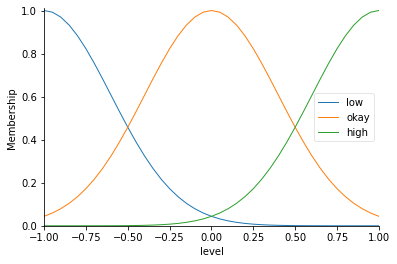

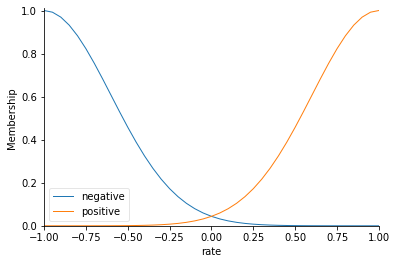

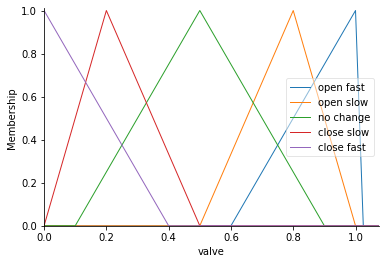

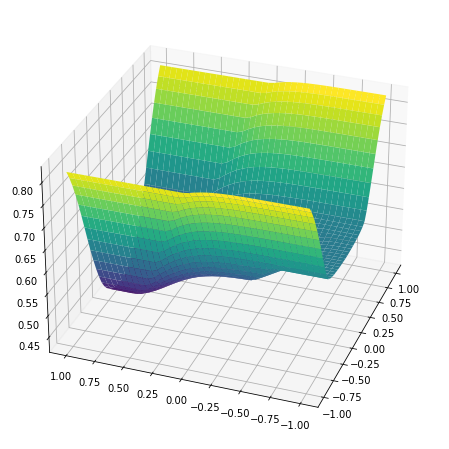

In [4]:
#Bài water level control
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

level = ctrl.Antecedent(np.arange(-1,1.05,0.05),'level')    
rate = ctrl.Antecedent(np.arange(-1,1.05,0.05),'rate')
valve = ctrl.Consequent(np.arange(0,1.1,0.025),'valve')

level['low']  = fuzz.gaussmf(level.universe,-1,0.4)
level['okay'] = fuzz.gaussmf(level.universe,0,0.4)
level['high'] = fuzz.gaussmf(level.universe,1,0.4)

rate['negative'] = fuzz.gaussmf(rate.universe,-1,0.4)
rate['positive'] = fuzz.gaussmf(rate.universe,1,0.4)


valve['open fast'] = fuzz.trimf(valve.universe,[0.6,1,1])   
valve['open slow'] = fuzz.trimf(valve.universe,[0.5,0.8,1])         
valve['no change'] = fuzz.trimf(valve.universe,[0.1,0.5,0.9])            
valve['close slow'] = fuzz.trimf(valve.universe,[0,0.2,0.5])         
valve['close fast'] = fuzz.trimf(valve.universe,[0,0,0.4])   

level.view()
rate.view()
valve.view()

rule1 = ctrl.Rule(antecedent=(level['low']),consequent=valve['open fast'],label='open fast')
rule2 = ctrl.Rule(antecedent=(level['okay']),consequent=valve['no change'],label='no change')
rule3 = ctrl.Rule(antecedent=(level['high']),consequent=valve['open fast'],label='close fast')
rule4 = ctrl.Rule(antecedent=((level['okay']&rate['negative'])),consequent=valve['open slow'],label='open slow')
rule5 = ctrl.Rule(antecedent=((level['okay']&rate['positive'])),consequent=valve['close slow'],label='close slow')

system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4,rule5])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 40*40+1)
unsampled = np.linspace(-1,1,40)
x,y = np.meshgrid(unsampled,unsampled)
z = np.zeros_like(x)

for i in range(40):
  for j in range(40): 
    sim.input['level'] = x[i,j]
    sim.input['rate'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['valve']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)

<ipython-input-11-17623450e641>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-11-17623450e641>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-11-17623450e641>:54: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


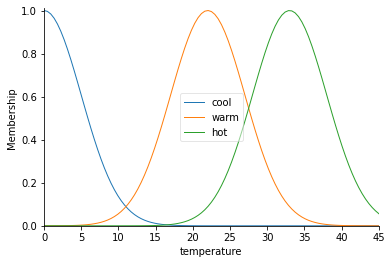

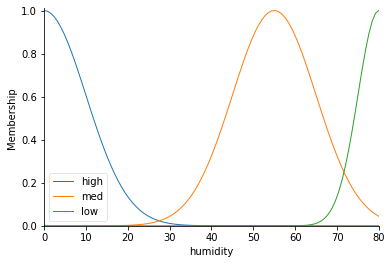

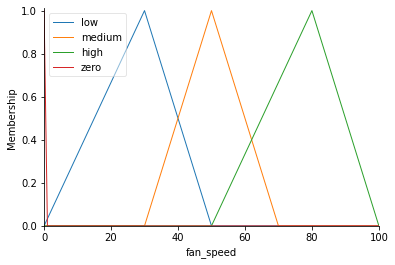

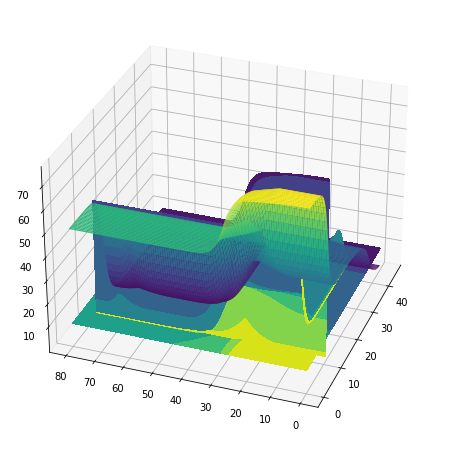

In [11]:
# Bài Temperature Controller

import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

temperature = ctrl.Antecedent(np.arange(0,45.45,0.45),'temperature')    
humidity = ctrl.Antecedent(np.arange(0,80.8,0.8),'humidity')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')

temperature['cool']  = fuzz.gaussmf(temperature.universe,0,5)
temperature['warm'] = fuzz.gaussmf(temperature.universe,22,5)
temperature['hot'] = fuzz.gaussmf(temperature.universe,33,5)

humidity['high'] = fuzz.gaussmf(humidity.universe,0,10)
humidity['med'] = fuzz.gaussmf(humidity.universe,55,10)
humidity['low'] = fuzz.gaussmf(humidity.universe,80,5)

fan_speed['low'] = fuzz.trimf(fan_speed.universe,[0,30,50])   
fan_speed['medium'] = fuzz.trimf(fan_speed.universe,[30,50,70])         
fan_speed['high'] = fuzz.trimf(fan_speed.universe,[50,80,100])            
fan_speed['zero'] = fuzz.trimf(fan_speed.universe,[0,0,0])         
  
temperature.view()
humidity.view()
fan_speed.view()

rule1 = ctrl.Rule(antecedent=((temperature['cool']&humidity['high'])),consequent=fan_speed['high'],label='high')
rule2 = ctrl.Rule(antecedent=((temperature['cool']&humidity['med'])|(temperature['cool']&humidity['low'])),consequent=fan_speed['medium'],label='medium')
rule3 = ctrl.Rule(antecedent=((temperature['warm']&humidity['high'])),consequent=fan_speed['low'],label='low')
rule4 = ctrl.Rule(antecedent=((temperature['hot']&humidity['high'])|(temperature['hot']&humidity['med'])|(temperature['hot']&humidity['low'])|(temperature['warm']&humidity['med'])|(temperature['warm']&humidity['low'])),consequent=fan_speed['zero'],label='zero')

system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 100*100+1)
unsampled = np.linspace(0,45,100)
unsampled1 = np.linspace(0,80,100)
x,y = np.meshgrid(unsampled,unsampled1)
z = np.zeros_like(x)

for i in range(100):
  for j in range(100): 
    sim.input['temperature'] = x[i,j]
    sim.input['humidity'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['fan_speed']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)

<ipython-input-10-737b9fa2c652>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-10-737b9fa2c652>:54: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-10-737b9fa2c652>:55: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


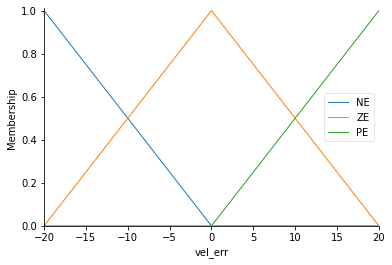

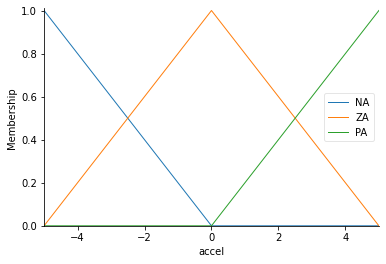

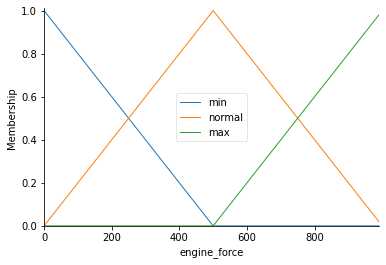

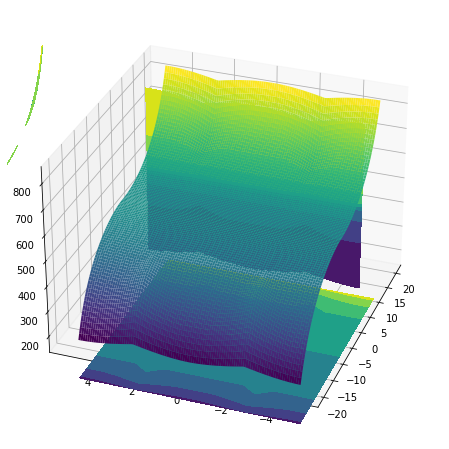

In [10]:
#Bài Automobile cruise control
# Bài Temperature Controller

import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

vel_err = ctrl.Antecedent(np.arange(-20,20.4,0.4),'vel_err')    
accel = ctrl.Antecedent(np.arange(-5,5.1,0.1),'accel')
engine_force = ctrl.Consequent(np.arange(0,1000,10),'engine_force')

vel_err['NE']  = fuzz.trimf(vel_err.universe,[-20,-20,0])  
vel_err['ZE'] = fuzz.trimf(vel_err.universe,[-20,0,20])  
vel_err['PE'] = fuzz.trimf(vel_err.universe,[0,20,20])  

accel['NA'] = fuzz.trimf(accel.universe,[-5,-5,0])  
accel['ZA'] = fuzz.trimf(accel.universe,[-5,0,5])  
accel['PA'] = fuzz.trimf(accel.universe,[0,5,5])  

engine_force['min'] = fuzz.trimf(engine_force.universe,[0,0,500])   
engine_force['normal'] = fuzz.trimf(engine_force.universe,[0,500,1000])         
engine_force['max'] = fuzz.trimf(engine_force.universe,[500,1000,1000])            
       
  
vel_err.view()
accel.view()
engine_force.view()

rule1 = ctrl.Rule(antecedent=((vel_err['NE']&accel['NA'])|(vel_err['NE']&accel['ZA'])|(vel_err['NE']&accel['PA'])),consequent=engine_force['min'],label='min')
rule2 = ctrl.Rule(antecedent=((vel_err['ZE']&accel['NA'])|(vel_err['ZE']&accel['ZA'])|(vel_err['ZE']&accel['PA'])),consequent=engine_force['normal'],label='normal')
rule3 = ctrl.Rule(antecedent=((vel_err['PE']&accel['NA'])|(vel_err['PE']&accel['ZA'])|(vel_err['PE']&accel['PA'])),consequent=engine_force['max'],label='max')


system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 100*100+1)
unsampled = np.linspace(-20,20,100)
unsampled1 = np.linspace(-5,5,100)
x,y = np.meshgrid(unsampled,unsampled1)
z = np.zeros_like(x)

for i in range(100):
  for j in range(100): 
    sim.input['vel_err'] = x[i,j]
    sim.input['accel'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['engine_force']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)

<ipython-input-7-d6a3944969b9>:51: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-7-d6a3944969b9>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-7-d6a3944969b9>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


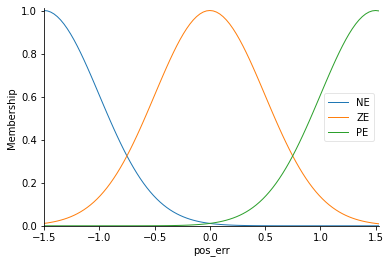

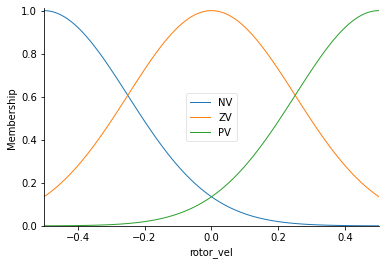

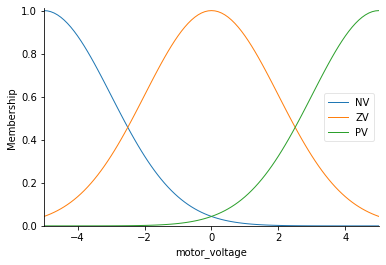

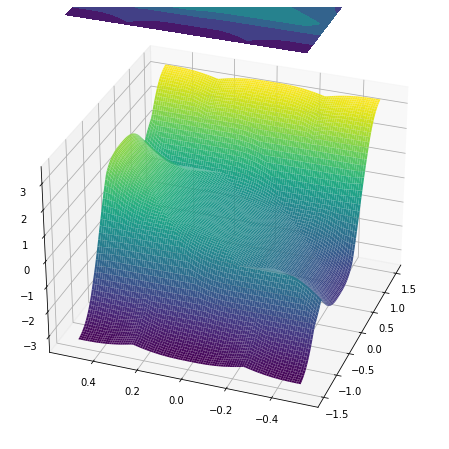

In [7]:
#Bài Controlling dynamics of a servomotor

import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

pos_err = ctrl.Antecedent(np.arange(-1.5,1.53,0.03),'pos_err')    
rotor_vel = ctrl.Antecedent(np.arange(-0.5,0.51,0.01),'rotor_vel')
motor_voltage = ctrl.Consequent(np.arange(-5,5.1,0.1),'motor_voltage')

pos_err['NE']  = fuzz.gaussmf(pos_err.universe,-1.5,0.5)
pos_err['ZE']  = fuzz.gaussmf(pos_err.universe,0,0.5)  
pos_err['PE']  = fuzz.gaussmf(pos_err.universe,1.5,0.5)

rotor_vel['NV'] = fuzz.gaussmf(rotor_vel.universe,-0.5,0.25)
rotor_vel['ZV'] = fuzz.gaussmf(rotor_vel.universe,0,0.25) 
rotor_vel['PV'] = fuzz.gaussmf(rotor_vel.universe,0.5,0.25)  

motor_voltage['NV'] = fuzz.gaussmf(motor_voltage.universe,-5,2)  
motor_voltage['ZV'] = fuzz.gaussmf(motor_voltage.universe,0,2)         
motor_voltage['PV'] = fuzz.gaussmf(motor_voltage.universe,5,2)            

pos_err.view()
rotor_vel.view()
motor_voltage.view()

rule1 = ctrl.Rule(antecedent=((pos_err['NE']&rotor_vel['NV'])|(pos_err['NE']&rotor_vel['ZV'])|(pos_err['NE']&rotor_vel['PV'])|(pos_err['ZE']&rotor_vel['NV'])),consequent=motor_voltage['NV'],label='NV')
rule2 = ctrl.Rule(antecedent=((pos_err['ZE']&rotor_vel['ZV'])),consequent=motor_voltage['ZV'],label='ZV')
rule3 = ctrl.Rule(antecedent=((pos_err['PE']&rotor_vel['NV'])|(pos_err['PE']&rotor_vel['ZV'])|(pos_err['PE']&rotor_vel['PV'])|(pos_err['ZE']&rotor_vel['PV'])),consequent=motor_voltage['PV'],label='PV')


system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 100*100+1)
unsampled = np.linspace(-1.5,1.5,100)
unsampled1 = np.linspace(-0.5,0.5,100)
x,y = np.meshgrid(unsampled,unsampled1)
z = np.zeros_like(x)

for i in range(100):
  for j in range(100): 
    sim.input['pos_err'] = x[i,j]
    sim.input['rotor_vel'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['motor_voltage']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)